In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import calendar
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle
warnings.filterwarnings('ignore')



In [4]:
df = pd.read_csv(r'C:\Users\USER\Desktop\main_projects\weather forecast high uv\Nairobi Kenya weather forecast.csv')
df


,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"Nairobi, Kenya",2024-05-14,77.2,61.0,68.9,77.2,61.0,68.9,58.3,70.8,...,20.2,8,10,2024-05-14T06:27:20,2024-05-14T18:30:53,0.20,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"HKJK,63741099999,HKNW,63740099999,63742099999"
1,"Nairobi, Kenya",2024-05-15,78.0,62.6,69.4,78.0,62.6,69.4,59.1,71.3,...,19.9,7,10,2024-05-15T06:27:22,2024-05-15T18:30:53,0.25,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"HKJK,63741099999,HKNW,63740099999,63742099999"
2,"Nairobi, Kenya",2024-05-16,79.6,61.0,68.4,79.6,61.0,68.4,59.5,75.1,...,18.2,7,10,2024-05-16T06:27:24,2024-05-16T18:30:53,0.27,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"HKJK,63741099999,HKNW,63740099999,63742099999"
3,"Nairobi, Kenya",2024-05-17,78.8,60.1,68.7,78.8,60.1,68.7,60.4,76.7,...,19.1,8,10,2024-05-17T06:27:27,2024-05-17T18:30:54,0.30,"Rain, Partially cloudy",Partly cloudy throughout the day with afternoo...,rain,"HKJK,63741099999,HKNW,63740099999,63742099999"
4,"Nairobi, Kenya",2024-05-18,79.1,62.4,69.9,79.1,62.4,69.9,60.6,74.2,...,19.9,8,10,2024-05-18T06:27:31,2024-05-18T18:30:55,0.33,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"HKJK,63741099999,remote,HKNW,63740099999,63742..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,"Nairobi, Kenya",2025-05-10,77.2,62.4,67.8,77.2,62.4,67.8,58.5,73.7,...,23.0,9,10,2025-05-10T06:27:19,2025-05-10T18:31:02,0.42,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"HKJK,63741099999,HKNW,63740099999,63742099999"
362,"Nairobi, Kenya",2025-05-11,78.8,62.2,66.9,78.8,62.2,66.9,59.3,78.4,...,21.1,9,10,2025-05-11T06:27:18,2025-05-11T18:30:59,0.46,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"HKJK,63741099999,HKNW,63740099999,63742099999"
363,"Nairobi, Kenya",2025-05-12,78.3,60.3,67.4,78.3,60.3,67.4,58.5,75.0,...,17.6,9,30,2025-05-12T06:27:19,2025-05-12T18:30:57,0.50,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"HKJK,63741099999,HKNW,63742099999"
364,"Nairobi, Kenya",2025-05-13,75.1,57.8,65.4,75.1,57.8,65.4,59.6,82.3,...,13.9,8,10,2025-05-13T06:27:19,2025-05-13T18:30:55,0.52,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"HKJK,remote,HKNW"


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              366 non-null    object 
 1   datetime          366 non-null    object 
 2   tempmax           366 non-null    float64
 3   tempmin           366 non-null    float64
 4   temp              366 non-null    float64
 5   feelslikemax      366 non-null    float64
 6   feelslikemin      366 non-null    float64
 7   feelslike         366 non-null    float64
 8   dew               366 non-null    float64
 9   humidity          366 non-null    float64
 10  precip            366 non-null    float64
 11  precipprob        366 non-null    int64  
 12  precipcover       366 non-null    float64
 13  preciptype        264 non-null    object 
 14  snow              366 non-null    int64  
 15  snowdepth         366 non-null    int64  
 16  windgust          366 non-null    float64
 1

<Axes: >

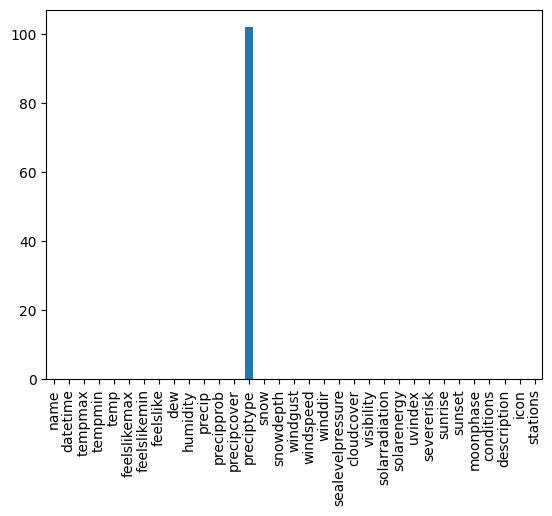

In [6]:
df.isna().sum().plot(kind='bar')


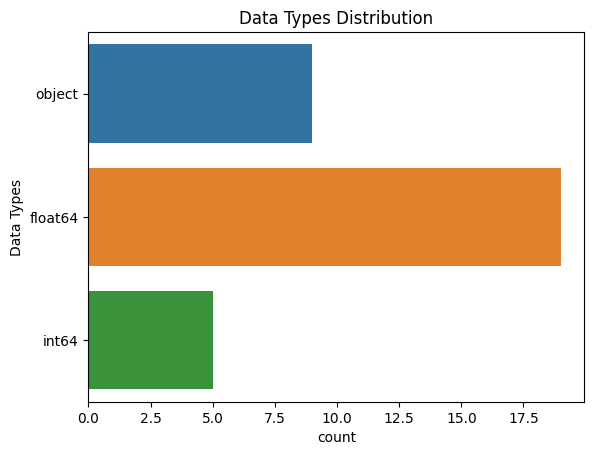

In [7]:
sns.countplot(y = df.dtypes, data=df, hue = df.dtypes)
plt.title('Data Types Distribution')
plt.ylabel('Data Types')
plt.show()


In [8]:
cols = ['datetime', 'sunrise', 'sunset']

for col in cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

df['preciptype'] = df['preciptype'].fillna('None')    


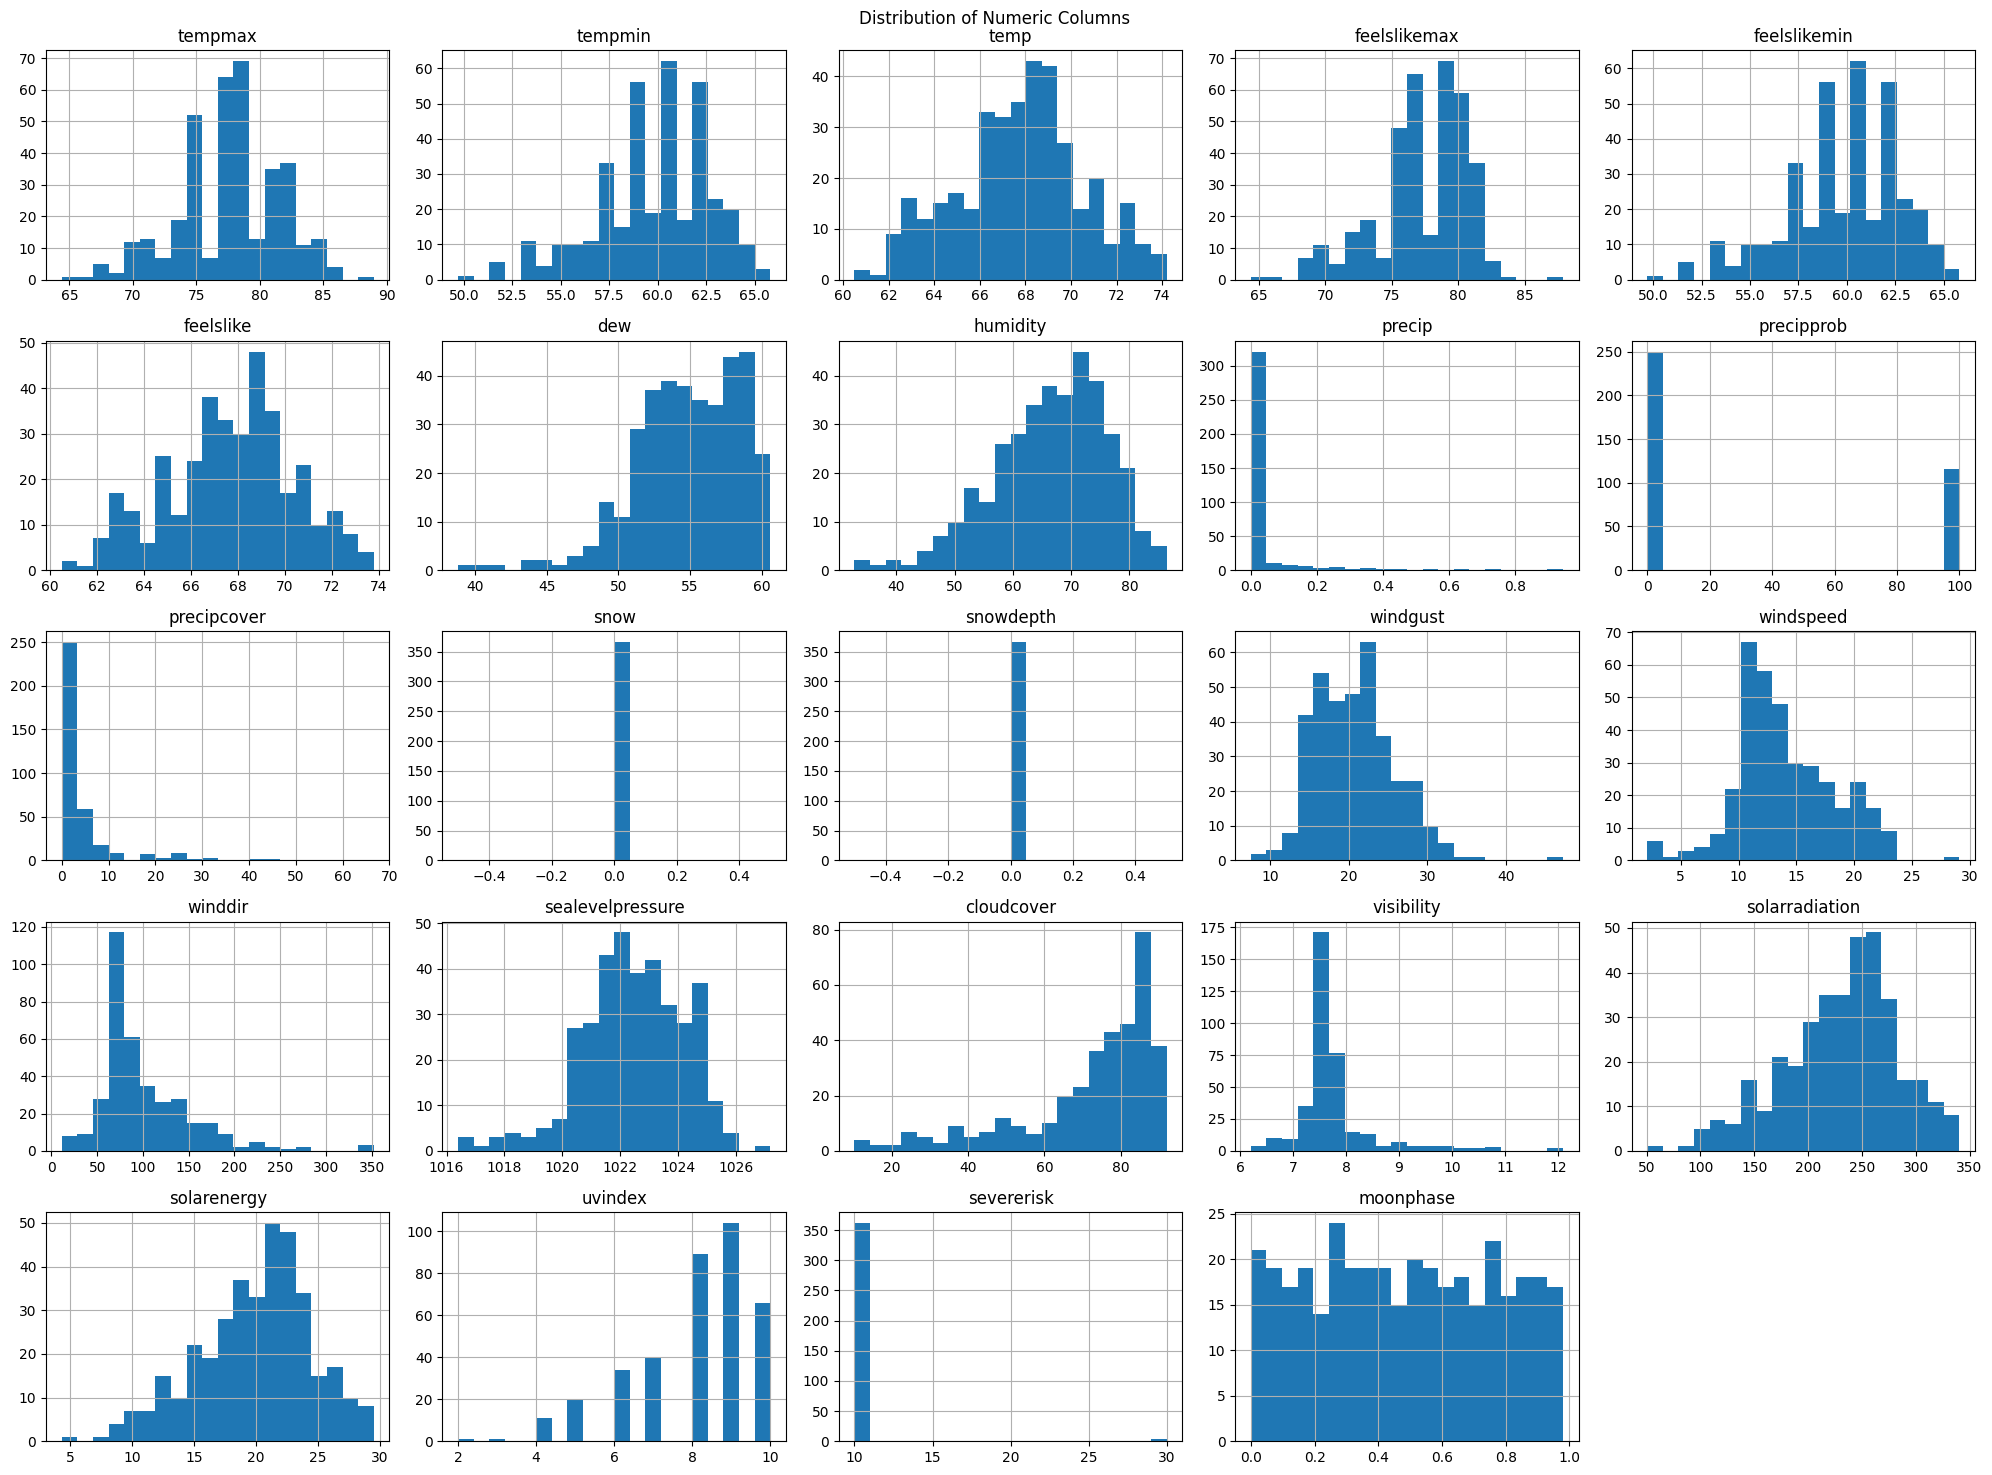

In [9]:
numeric_col = df.select_dtypes(include = ['int', 'float']).columns

df[numeric_col].hist(bins=20, figsize=(20, 15));
plt.suptitle('Distribution of Numeric Columns')
plt.tight_layout()
plt.show()


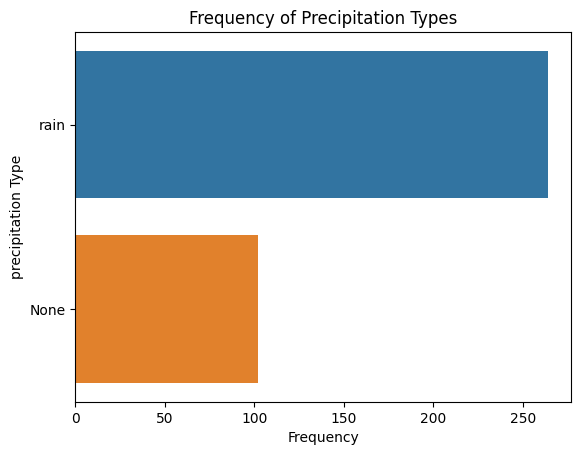

In [10]:
sns.countplot(data = df, y = 'preciptype', hue = 'preciptype')
plt.title('Frequency of Precipitation Types')
plt.ylabel('precipitation Type')
plt.xlabel('Frequency')
plt.show()


<Axes: xlabel='count', ylabel='conditions'>

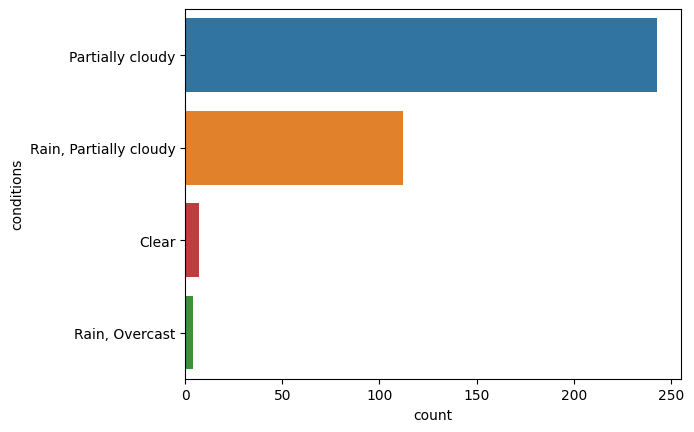

In [11]:
sns.countplot(data = df, y = 'conditions', order  = df['conditions'].value_counts(ascending=False).index, hue = 'conditions')


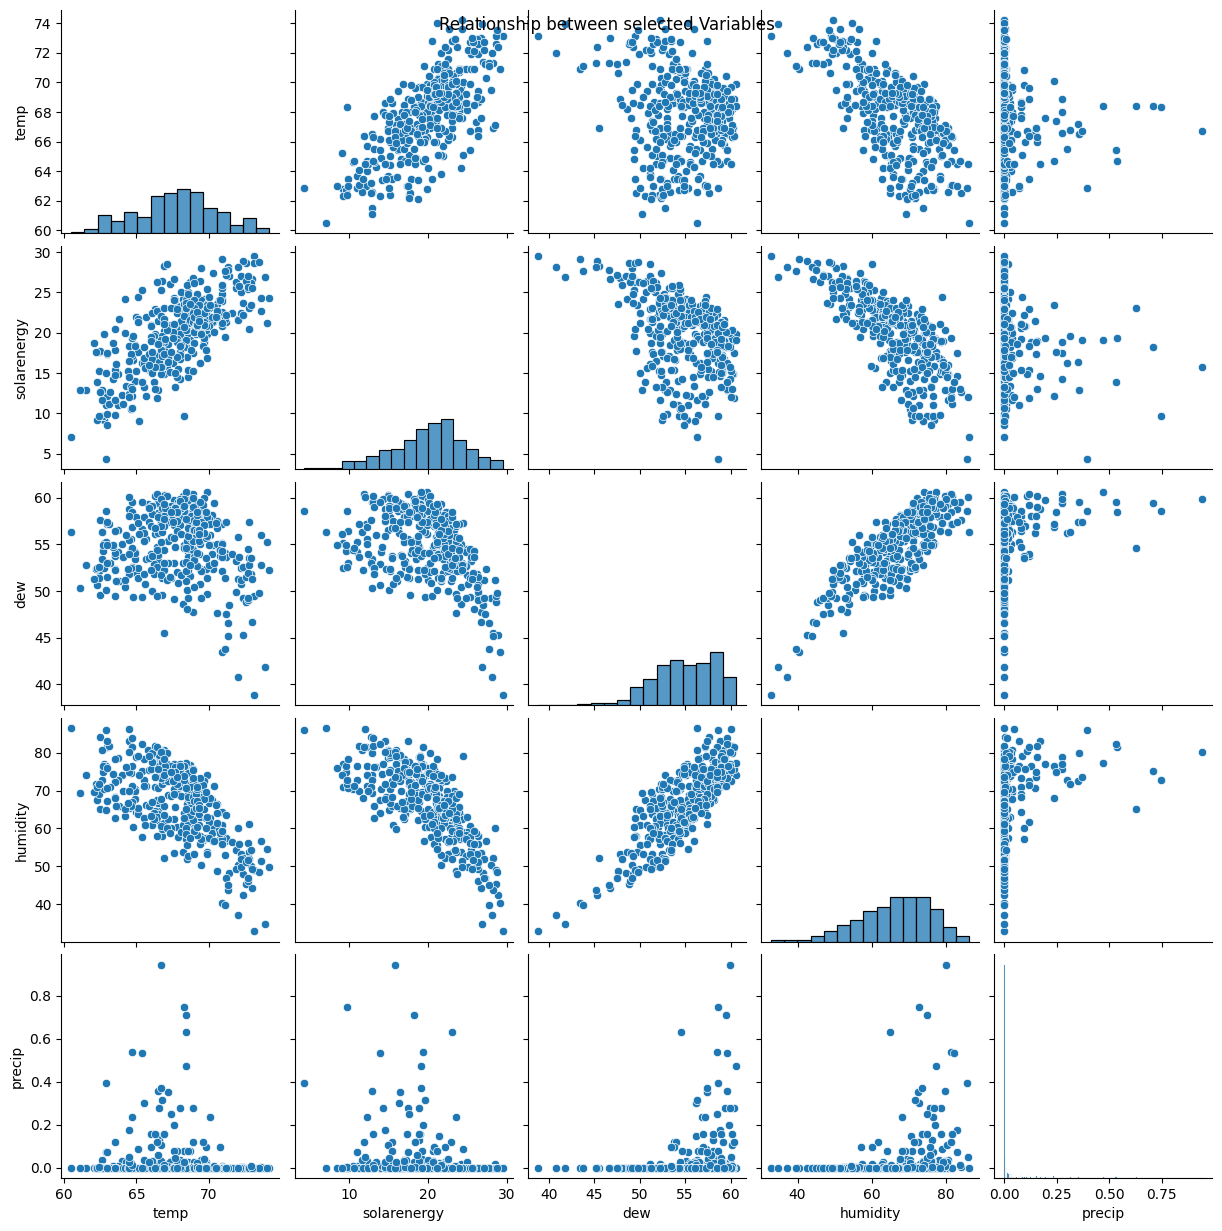

In [12]:
sns.pairplot(df[['temp', 'solarenergy', 'dew', 'humidity', 'precip']])
plt.suptitle('Relationship between selected Variables')
plt.show()


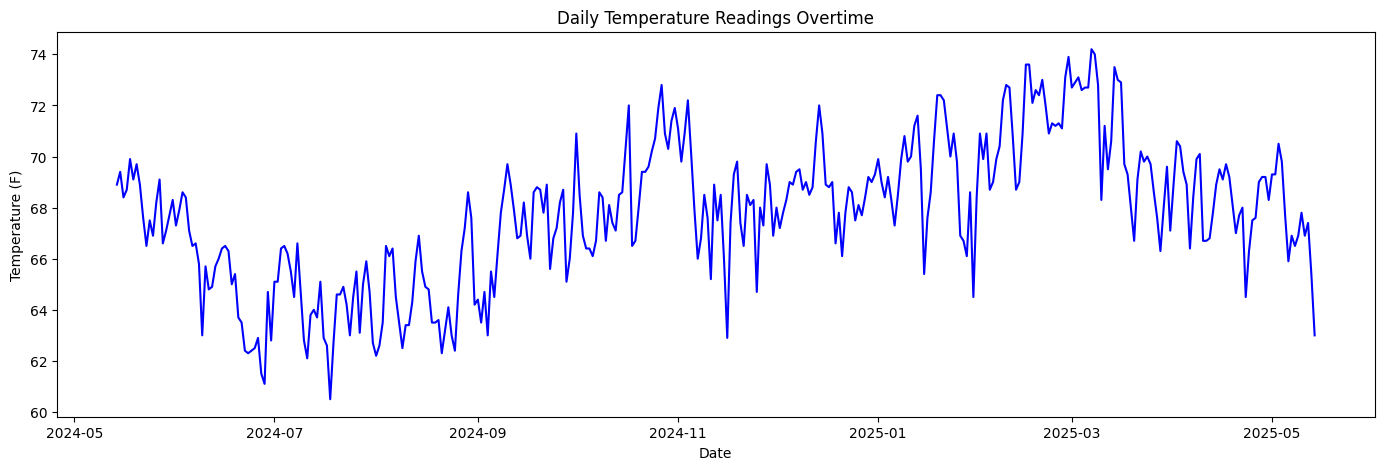

In [13]:
plt.figure(figsize = (17, 5))
sns.lineplot(data = df, x = 'datetime', y = 'temp', c = 'blue')
plt.xlabel('Date')
plt.ylabel('Temperature (F)')
plt.title('Daily Temperature Readings Overtime')
plt.show()


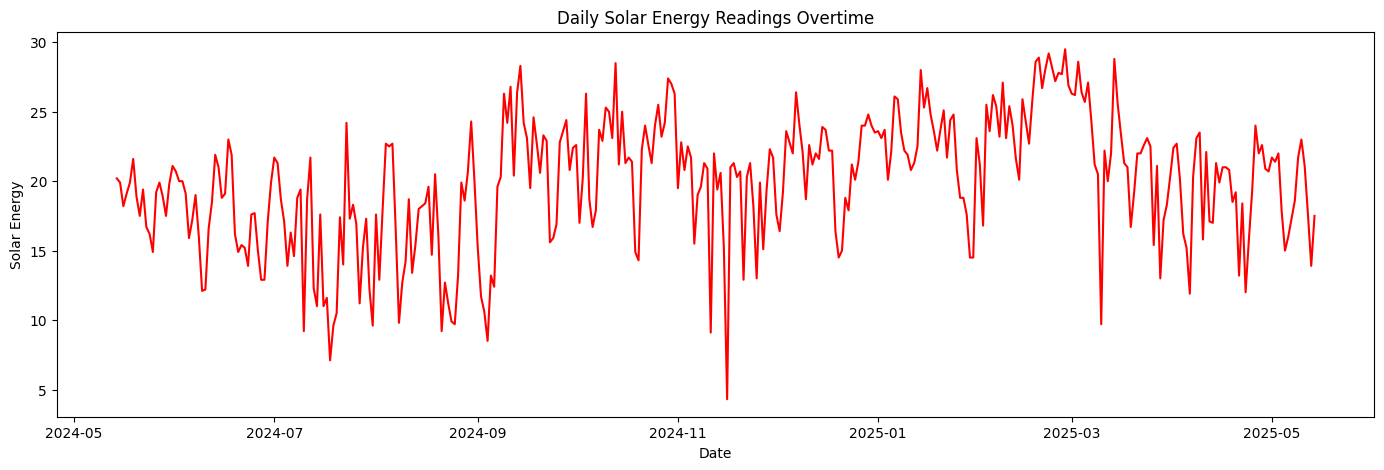

In [14]:
plt.figure(figsize = (17, 5))
sns.lineplot(data = df, x = 'datetime', y = 'solarenergy', c = 'red')
plt.xlabel('Date')
plt.ylabel('Solar Energy')
plt.title('Daily Solar Energy Readings Overtime')
plt.show()


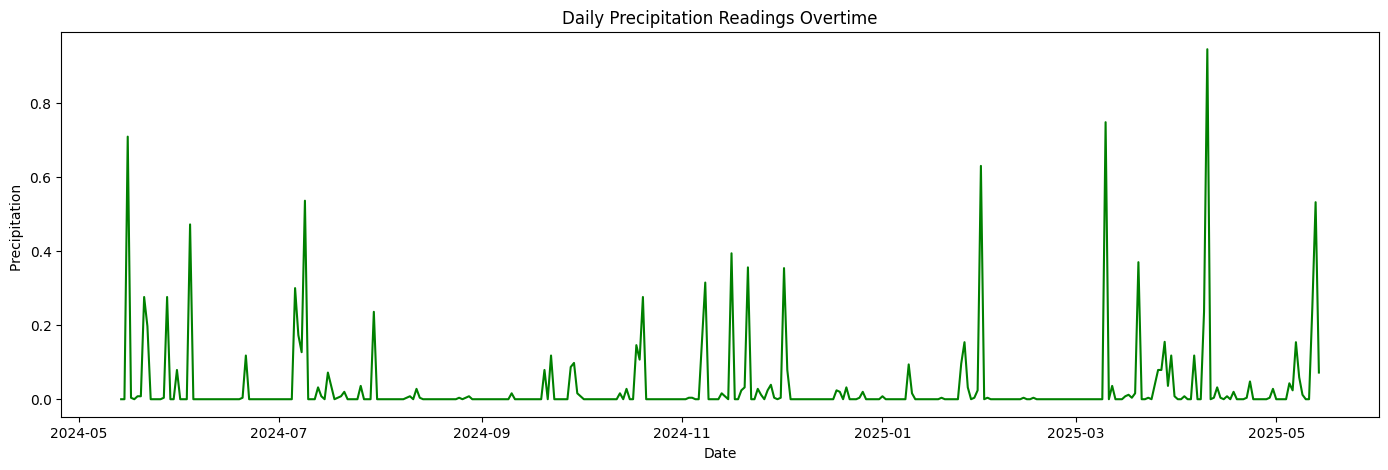

In [15]:
plt.figure(figsize = (17, 5))
sns.lineplot(data = df, x = 'datetime', y = 'precip', c = 'green')
plt.xlabel('Date')
plt.ylabel('Precipitation ')
plt.title('Daily Precipitation Readings Overtime')
plt.show()


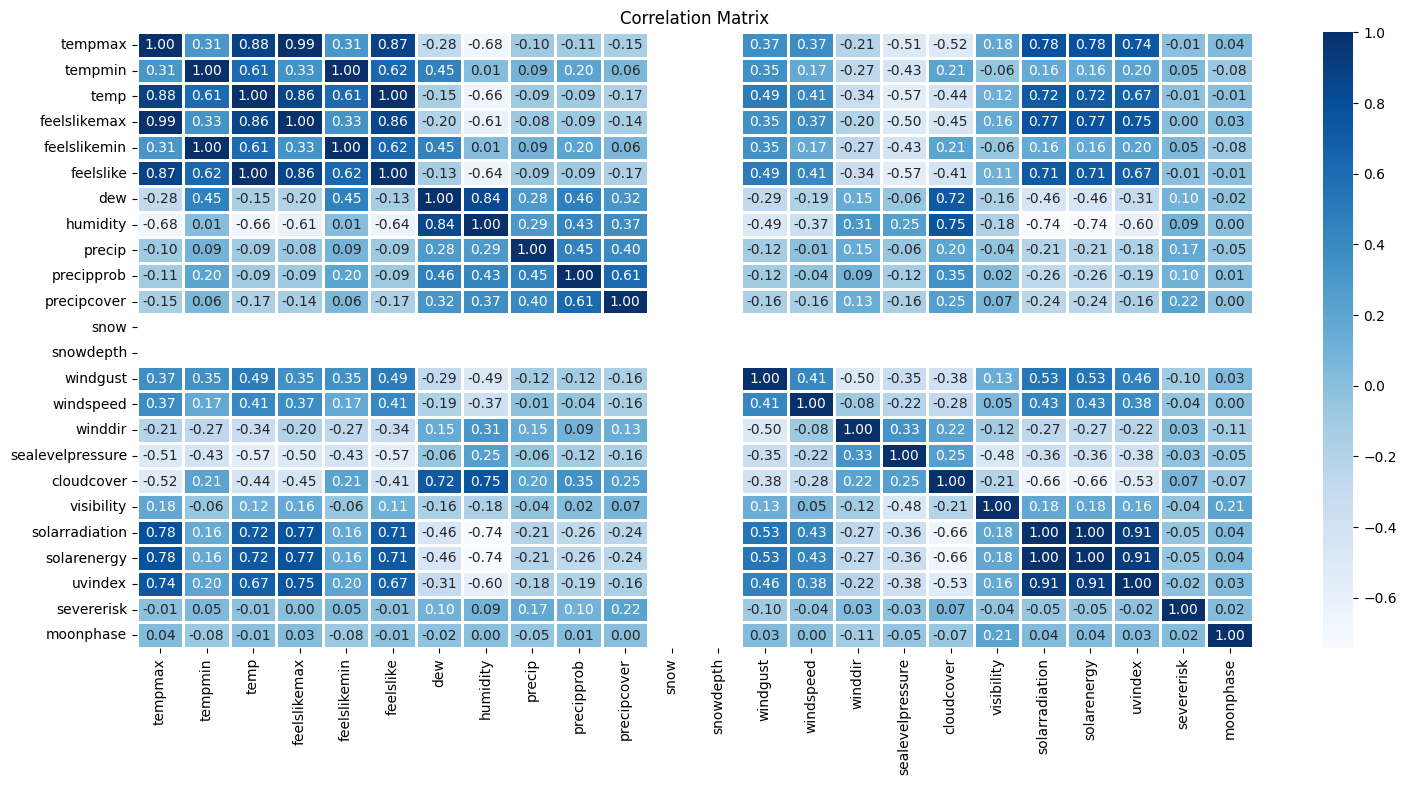

In [16]:
corrs = df.select_dtypes(include='number').corr()
plt.figure(figsize = (18, 8))
sns.heatmap(corrs, annot = True, fmt = '.2f', cmap = 'Blues',lw=1)
plt.title('Correlation Matrix')
plt.show()


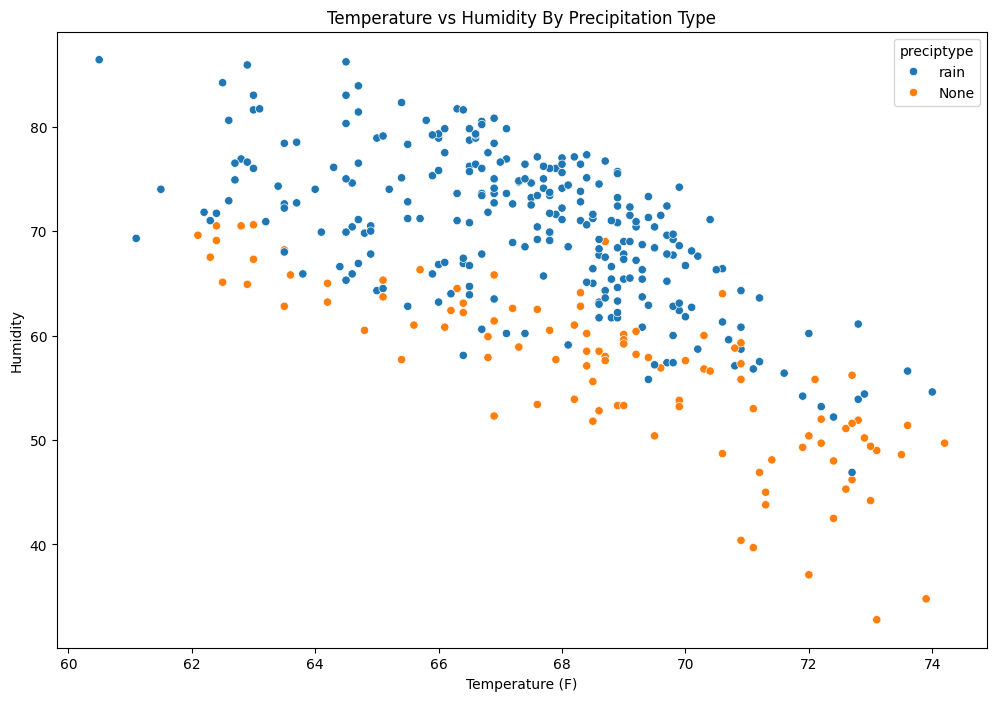

In [17]:
plt.figure(figsize = (12, 8))
sns.scatterplot(data = df, x = 'temp', y='humidity', hue = 'preciptype')
plt.title('Temperature vs Humidity By Precipitation Type')
plt.xlabel('Temperature (F)')
plt.ylabel('Humidity')
plt.show()


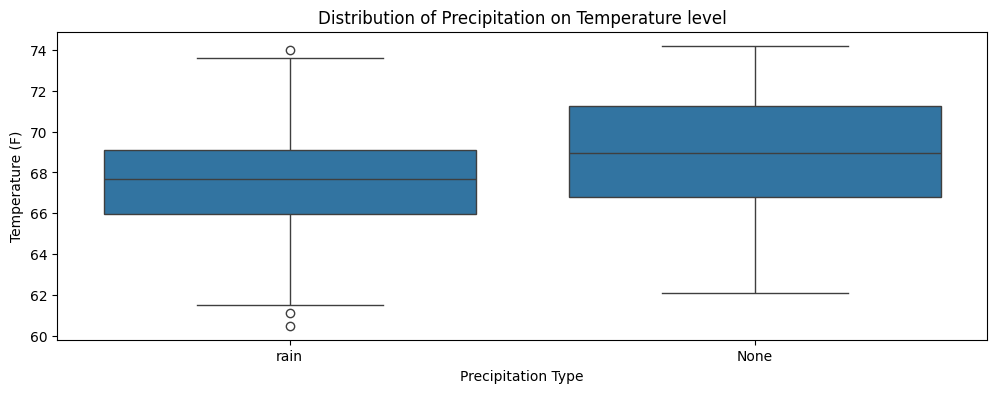

In [98]:
plt.figure(figsize = (12, 4))
sns.boxplot(data=df, x = 'preciptype', y = 'temp')
plt.title('Distribution of Precipitation on Temperature level')
plt.xlabel('Precipitation Type')
plt.ylabel('Temperature (F)')
plt.show()


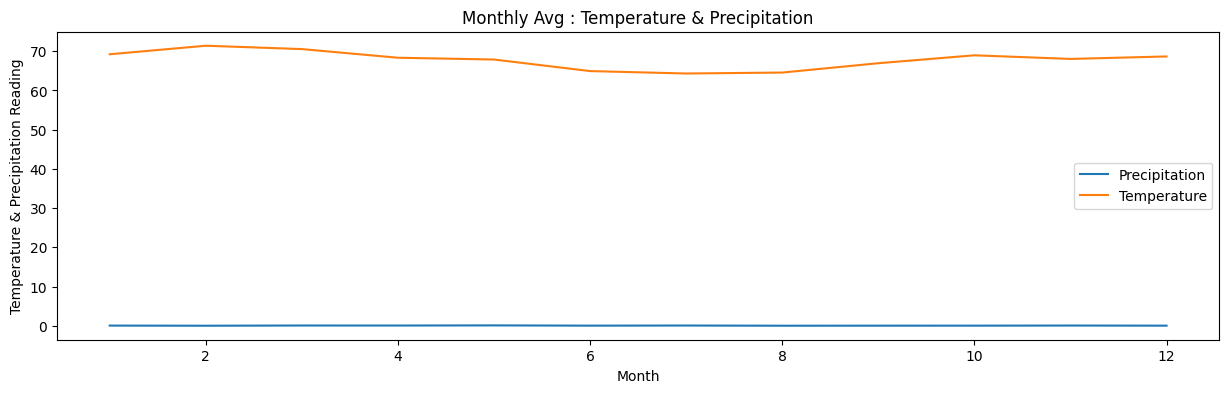

In [19]:
df['month'] = df['datetime'].dt.month
plt.figure(figsize = (15, 4))
monthly_avg = df.groupby('month')[['temp', 'precip']].mean().reset_index()
sns.lineplot(data = monthly_avg, x = 'month', y = 'precip', label = 'Precipitation')
sns.lineplot(data = monthly_avg, x = 'month', y = 'temp', label = 'Temperature')
plt.legend()
plt.title('Monthly Avg : Temperature & Precipitation')
plt.xlabel('Month')
plt.ylabel('Temperature & Precipitation Reading')
plt.show()


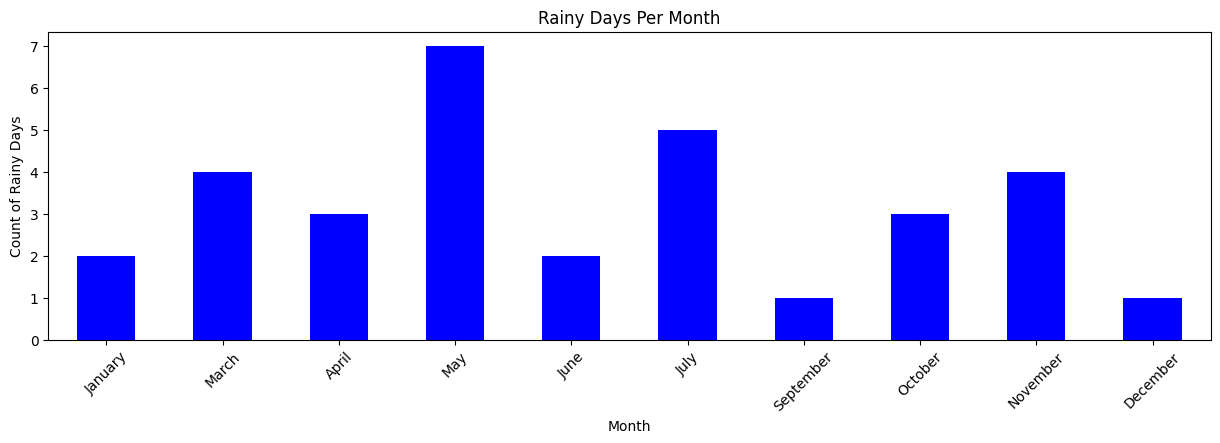

In [20]:
df['is_rainy'] = df['precip'] > 0.1
# Group by month and count
rainy_days = df[df['is_rainy']].groupby('month').size()
# Rename months using calendar.month_name
rainy_days.index = [calendar.month_name[m] for m in rainy_days.index]
# Plot
plt.figure(figsize = (15, 4))
rainy_days.plot(kind='bar', color='blue')
plt.title("Rainy Days Per Month")
plt.xlabel("Month")
plt.ylabel("Count of Rainy Days")
plt.xticks(rotation=45)
plt.show();


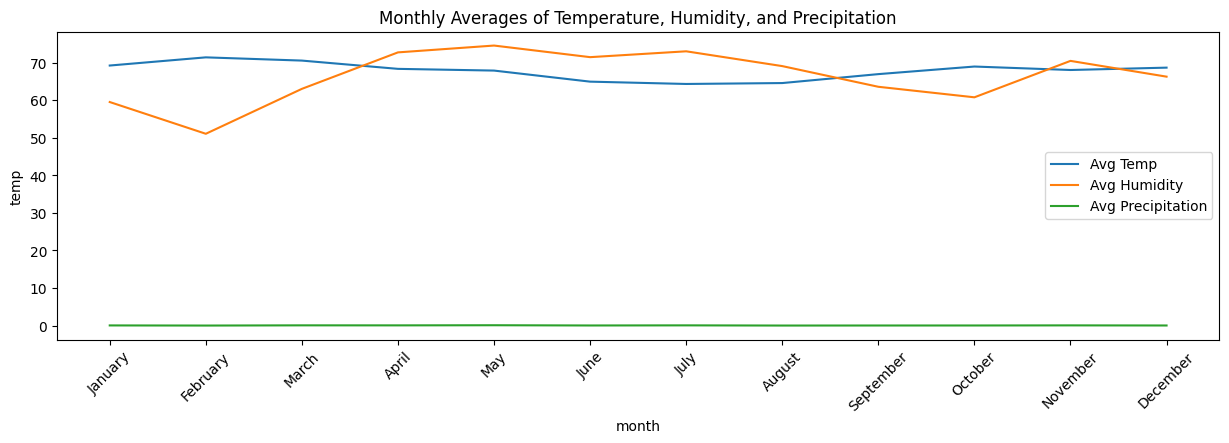

In [21]:
monthly_avg = df.groupby('month')[['temp', 'humidity', 'precip']].mean().reset_index()
monthly_avg['month'] = monthly_avg['month'].apply(lambda x: calendar.month_name[x])
plt.figure(figsize = (15, 4))
sns.lineplot(data=monthly_avg, x='month', y='temp', label='Avg Temp')
sns.lineplot(data=monthly_avg, x='month', y='humidity', label='Avg Humidity')
sns.lineplot(data=monthly_avg, x='month', y='precip', label='Avg Precipitation')
plt.xticks(rotation=45)
plt.title("Monthly Averages of Temperature, Humidity, and Precipitation")
plt.show()


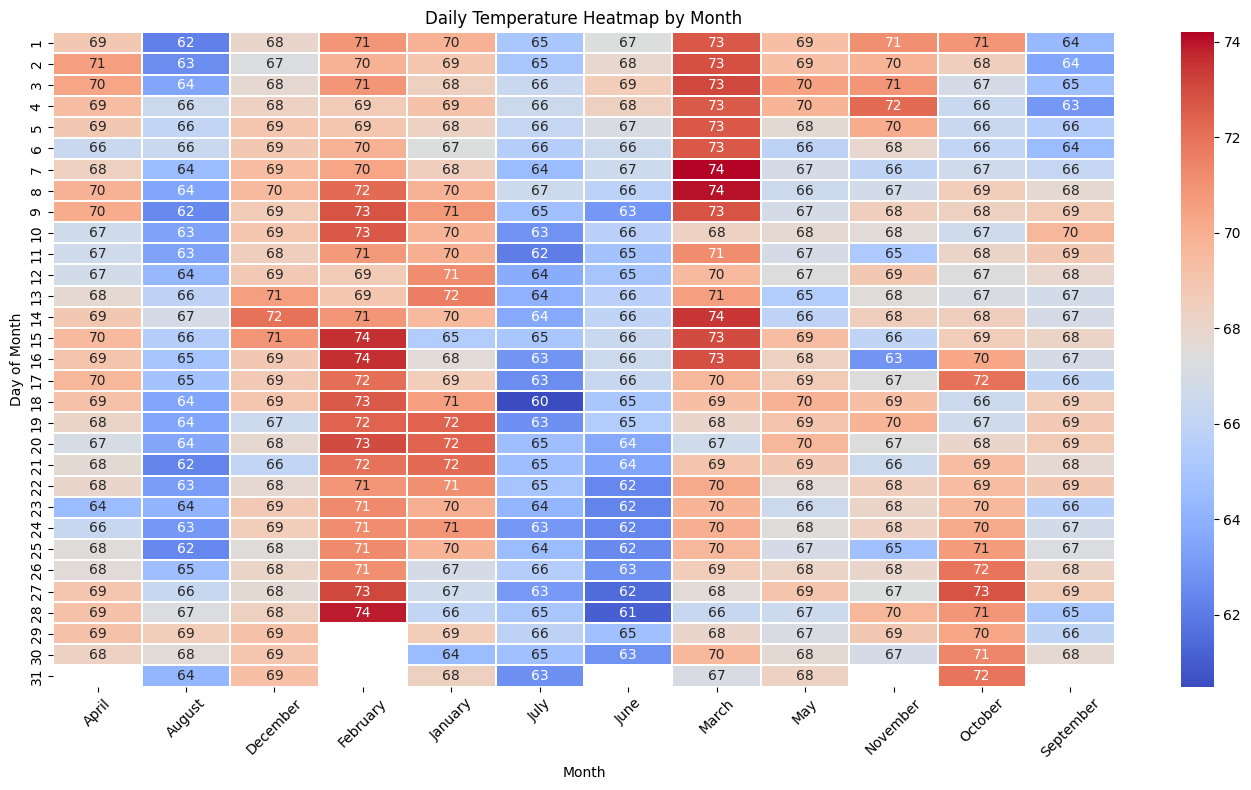

In [22]:

# Extract month name and day from datetime
df['month_name'] = df['datetime'].dt.month.apply(lambda x: calendar.month_name[x])
df['day'] = df['datetime'].dt.day

# Create pivot table
pivot = df.pivot_table(index='day', columns='month_name', values='temp')

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot, cmap='coolwarm', linewidths=0.3, annot=True)
plt.title("Daily Temperature Heatmap by Month")
plt.xlabel("Month")
plt.ylabel("Day of Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


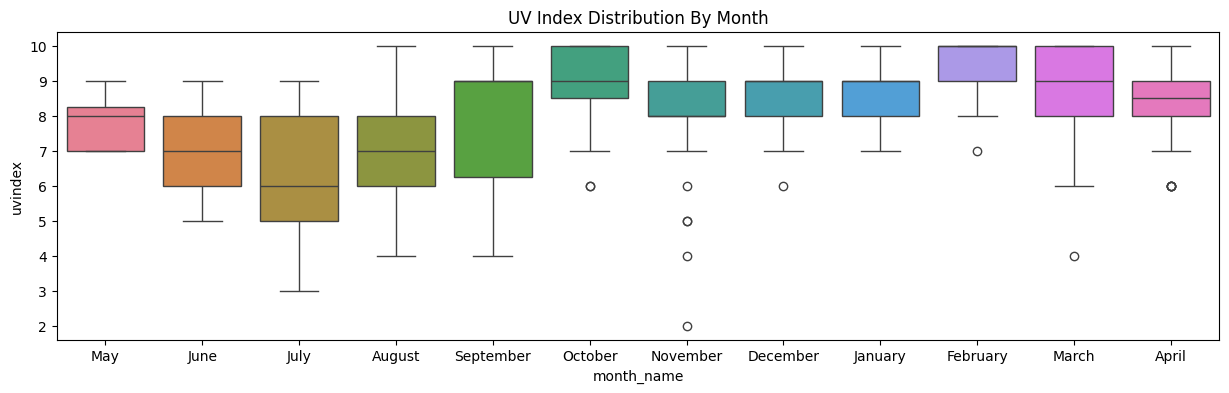

In [23]:
plt.figure(figsize = (15, 4))
sns.boxplot(data = df, x = 'month_name', y = 'uvindex', hue = 'month_name')
plt.title('UV Index Distribution By Month')
plt.show()


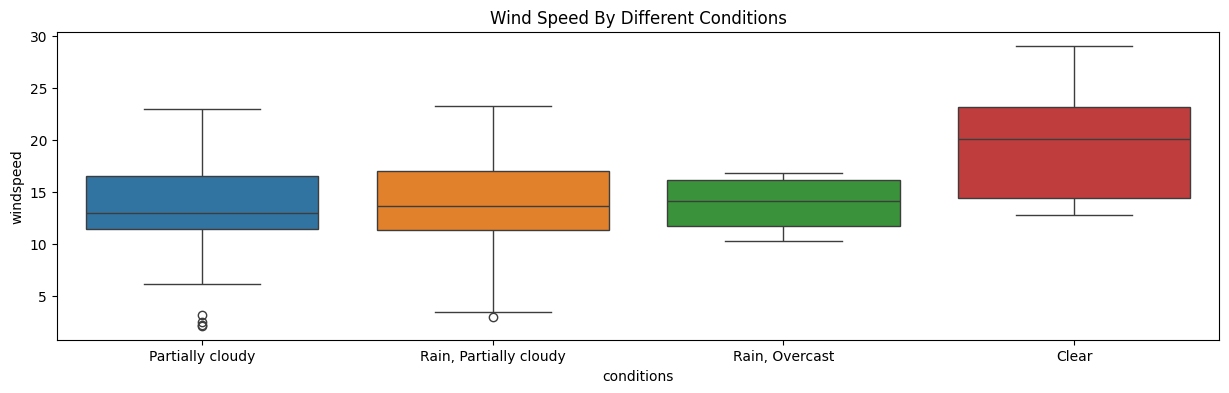

In [24]:
plt.figure(figsize = (15, 4))
sns.boxplot(data =df, x = 'conditions', y = 'windspeed', hue = 'conditions')
plt.title('Wind Speed By Different Conditions')
plt.show()


The Days With The High Solar Radiation is : 37 days


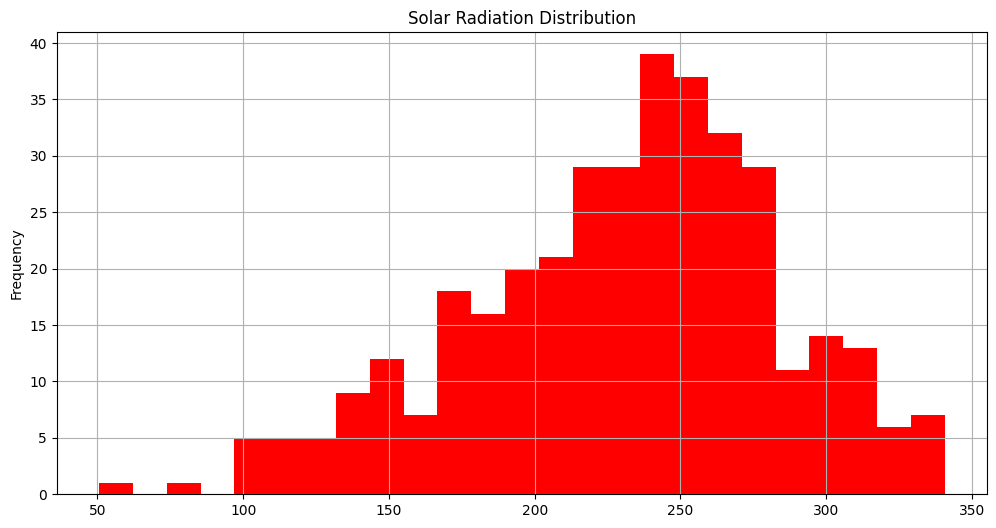

<Figure size 1200x500 with 0 Axes>

In [25]:
high_solar = df[df['solarradiation'] > df['solarradiation'].quantile(0.9)]
print(f'The Days With The High Solar Radiation is : {len(high_solar)} days')

df['solarradiation'].plot(kind='hist', bins=25,figsize = (12, 6), title = 'Solar Radiation Distribution', color = 'red', grid=True)
plt.figure(figsize = (12, 5))
plt.show()


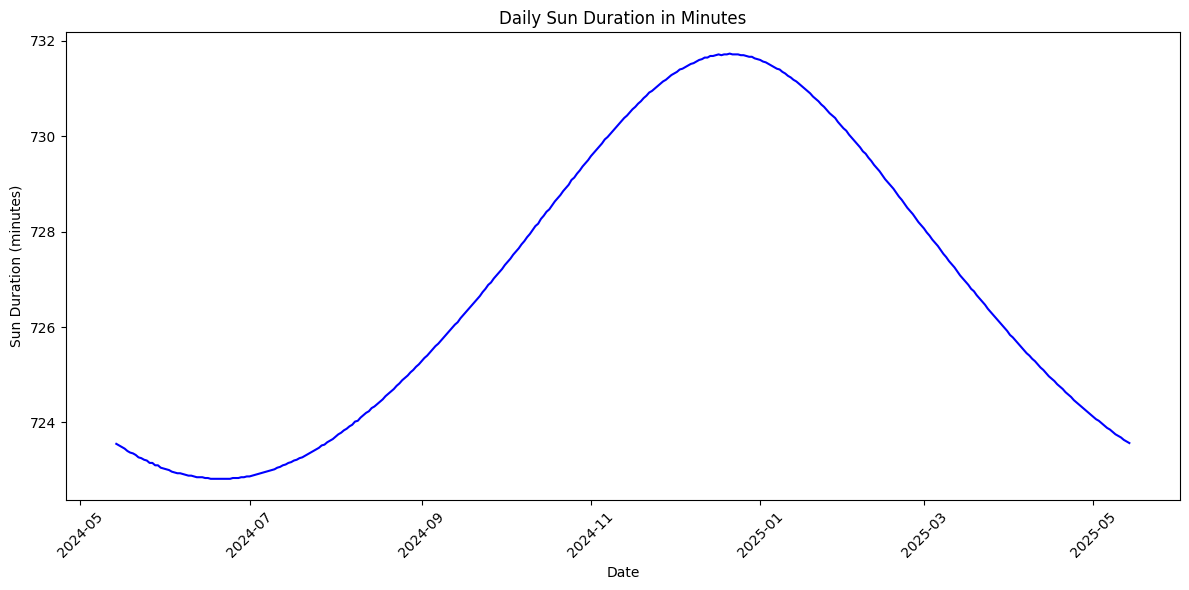

In [26]:

# Calculate sun duration in minutes
df['sun_duration_minutes'] = (df['sunset'] - df['sunrise']).dt.total_seconds() / 60

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='datetime', y='sun_duration_minutes', color='blue')
plt.title("Daily Sun Duration in Minutes")
plt.xlabel("Date")
plt.ylabel("Sun Duration (minutes)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



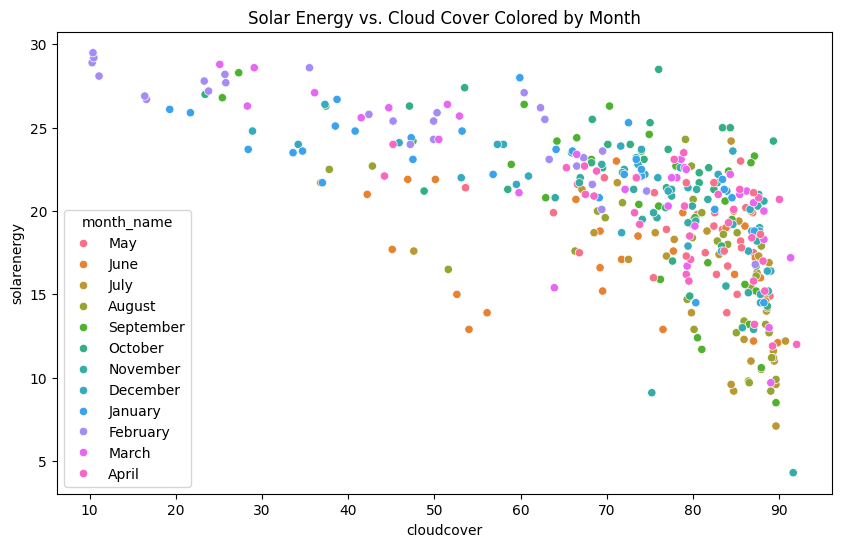

In [27]:
## Cloud Cover vs. Solar Energy
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='cloudcover', y='solarenergy', hue='month_name',)
plt.title("Solar Energy vs. Cloud Cover Colored by Month")
plt.show()


In [28]:
df['month'] = df['datetime'].dt.month
df['dayofweek'] = df['datetime'].dt.dayofweek
df['sun_duration_minutes'] = (df['sunset'] - df['sunrise']).dt.total_seconds() / 60


In [36]:
df['high_uv'] = (df['uvindex']> 8).astype(int)


<Axes: title={'center': 'Distribution of Target Column'}, xlabel='high_uv'>

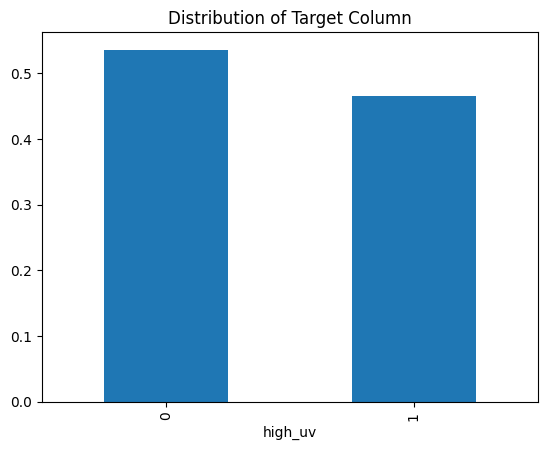

In [37]:
df['high_uv'].value_counts(normalize=True).plot(kind = 'bar', title = 'Distribution of Target Column')


In [ ]:
X = df[['temp', 'humidity', 'precip', 'solarradiation', 'cloudcover', 'sun_duration_minutes']]
y = df['high_uv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)



In [39]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("-" * 50)


Model: Logistic Regression
[[34  6]
 [ 4 30]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        40
           1       0.83      0.88      0.86        34

    accuracy                           0.86        74
   macro avg       0.86      0.87      0.86        74
weighted avg       0.87      0.86      0.87        74

--------------------------------------------------
Model: Random Forest
[[39  1]
 [ 4 30]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        40
           1       0.97      0.88      0.92        34

    accuracy                           0.93        74
   macro avg       0.94      0.93      0.93        74
weighted avg       0.93      0.93      0.93        74

--------------------------------------------------
Model: XGBoost
[[35  5]
 [ 4 30]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        40
           1   

[[39  1]
 [ 4 30]]
Accuracy: 0.93
Precision: 0.97
Recall: 0.88
ROC AUC: 0.93
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        40
           1       0.97      0.88      0.92        34

    accuracy                           0.93        74
   macro avg       0.94      0.93      0.93        74
weighted avg       0.93      0.93      0.93        74



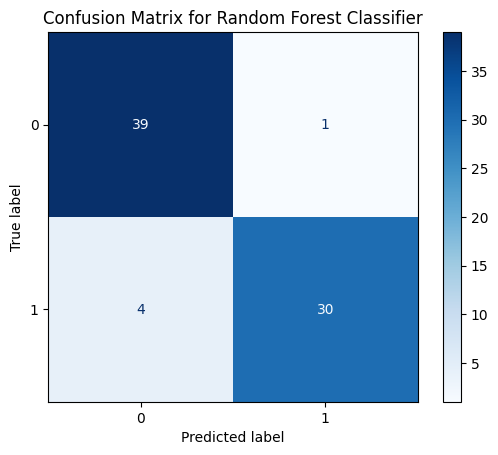

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall  = recall_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)
 
print(confusion_matrix(y_test, y_pred))
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"ROC AUC: {roc:.2f}")
print(classification_report(y_test, y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()


In [46]:
with open('nairobi_uv_model.pkl', 'wb') as f:
    pickle.dump((model), f)
